In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report



from imblearn.over_sampling import RandomOverSampler

In [25]:
#read Tracks and features

track_info_df=pd.read_csv(r'D:\University\AI_diploma\Technocolabs\fma-rock-vs-hiphop.csv')
#track_info_df.info()

track_features_df=pd.read_json(r'D:\University\AI_diploma\Technocolabs\echonest-metrics.json')
#track_features_df.info()

#merge tracks with features using the common id
#note we're gonna take only genre_top from info as the other features won't affect the model positively 

df=track_features_df.merge(track_info_df[['track_id','genre_top', 'listens', 'language_code', 'duration','favorites','interest']],on='track_id')
#df.drop(labels=['track_id'],axis=1,inplace=True)
label_enc=LabelEncoder()

#one hot encoding genre
df['genre_top']=label_enc.fit_transform(df['genre_top'])

df['language_code']=label_enc.fit_transform(df['language_code'])

df.info()
df.head(50)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   acousticness      4802 non-null   float64
 2   danceability      4802 non-null   float64
 3   energy            4802 non-null   float64
 4   instrumentalness  4802 non-null   float64
 5   liveness          4802 non-null   float64
 6   speechiness       4802 non-null   float64
 7   tempo             4802 non-null   float64
 8   valence           4802 non-null   float64
 9   genre_top         4802 non-null   int32  
 10  listens           4802 non-null   int64  
 11  language_code     4802 non-null   int32  
 12  duration          4802 non-null   int64  
 13  favorites         4802 non-null   int64  
 14  interest          4802 non-null   int64  
dtypes: float64(8), int32(2), int64(5)
memory usage: 562.7 KB


,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top,listens,language_code,duration,favorites,interest
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,0,1293,2,168,2,4656
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,0,514,2,237,1,1470
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,0,1151,2,206,6,1933
3,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,0,943,2,207,3,1126
4,153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018,1,424,2,405,5,354
5,154,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632,1,205,2,319,1,242
6,155,0.981657,0.142249,0.912122,0.967294,0.363510,0.087527,91.912,0.034325,1,197,2,756,1,268
7,169,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347,1,270,2,144,1,815
8,170,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548,1,122,2,181,0,468
9,171,0.698278,0.285816,0.213494,0.955691,0.087036,0.064094,125.645,0.150599,1,242,2,80,0,582


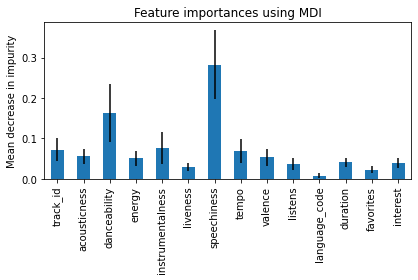

In [26]:
#feature selection
X=df.drop(labels=['genre_top'],axis=1)
y=df['genre_top']

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)
feature_names = [f"feature {i}" for i in range(X.shape[1])]

forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index= X.columns.to_list())

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [27]:
#trying OverSampling
oversample = RandomOverSampler(sampling_strategy='minority')
X_over,y_over=oversample.fit_resample(X,y)
print(Counter(y_over))


Counter({0: 3892, 1: 3892})


In [14]:
#outliers doesn't exist in valence,instrumentalness,energy,acousticness
#outliers exists in tempo, liveness,speechiness, danceability
#sns.boxplot(x=df['acousticness'])
#sns.boxplot(x=df['danceability'])
#sns.boxplot(x=df['energy'])
#df['speechiness'].hist()
#df['liveness'].hist()
#sns.boxplot(x=df['instrumentalness'])
#sns.boxplot(x=df['tempo'])
#sns.boxplot(x=df['valence'])

#check correlation:
corr =df.corr()
corr.style.background_gradient()



df['listens']=(df['listens']-df['listens'].mean())/df['listens'].std()
df['duration']=(df['duration']-df['duration'].mean())/df['duration'].std()
df['favorites']=(df['favorites']-df['favorites'].mean())/df['favorites'].std()
df['interest']=(df['interest']-df['interest'].mean())/df['interest'].std()
df['tempo']=(df['tempo']-df['tempo'].mean())/df['tempo'].std()

df.head()
df.drop(labels=['language_code','favorites','listens','interest', 'liveness','instrumentalness'],axis=1,inplace=True)


df=df[df['tempo']<232] #removing tempo outliers
df=df[df['speechiness']<0.2]
df=df[df['danceability']<0.91]
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4185 entries, 0 to 4791
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   track_id      4185 non-null   int64  
 1   acousticness  4185 non-null   float64
 2   danceability  4185 non-null   float64
 3   energy        4185 non-null   float64
 4   speechiness   4185 non-null   float64
 5   tempo         4185 non-null   float64
 6   valence       4185 non-null   float64
 7   genre_top     4185 non-null   int32  
 8   duration      4185 non-null   float64
dtypes: float64(7), int32(1), int64(1)
memory usage: 310.6 KB


,track_id,acousticness,danceability,energy,speechiness,tempo,valence,genre_top,duration
0,2,0.416675,0.675894,0.634476,0.159310,1.153859,0.576661,0,-0.321357
2,5,0.043567,0.745566,0.701470,0.124595,-0.777236,0.621661,0,-0.122006
4,153,0.988306,0.255661,0.979774,0.051740,-1.071891,0.034018,1,0.921960
5,154,0.970135,0.352946,0.023852,0.032177,-2.144842,0.035632,1,0.470798
6,155,0.981657,0.142249,0.912122,0.087527,-1.022747,0.034325,1,2.763327


In [28]:
#split data into train-test
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.33,random_state=42,stratify=y_over)


In [29]:
#initialize model DT
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=15, random_state=0)
#train
clf_gini.fit(X_train,y_train)
#predict
yhat=clf_gini.predict(X_train)
#Test and compare
y_pred_gini = clf_gini.predict(X_test)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(f1_score(y_test, y_pred_gini)))
print('Training accuracy is : {0:0.4f}'. format(f1_score(y_train, yhat)))

Model accuracy score with criterion gini index: 0.9509
Training accuracy is : 0.9892


In [30]:
#initialize the model
log_model=LogisticRegression(random_state = 10, solver='liblinear',max_iter=200)
#train
log_model.fit(X_train, y_train)
#predict
yhat_log=log_model.predict(X_train)
#Test and compare
pred_log = log_model.predict(X_test)
print('Model accuracy score with logistic regression : \n{0:0.4f}\n'. format(f1_score(y_test, pred_log)))
print('Training accuracy is : {0:0.4f}'. format(f1_score(y_train, yhat_log)))

Model accuracy score with logistic regression : 
0.8489

Training accuracy is : 0.8441


In [41]:
#cross validation For DT
cross_val=KFold(n_splits=5,random_state=1,shuffle=True)
scores = cross_val_score(clf_gini, X_over, y_over, scoring='accuracy', cv=cross_val, n_jobs=-1)
print('Average Accuracy for Descision Tree: {0:0.4f}'.format(np.mean(scores)))

Average Accuracy: 0.9571


In [42]:
#cross Validation For log_reg
scores = cross_val_score(log_model, X_over, y_over, scoring='accuracy', cv=cross_val, n_jobs=-1)
print('Average Accuracy for Descision Tree: {0:0.4f}'.format(np.mean(scores)))

Average Accuracy for Descision Tree: 0.8370
